<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/Binary_Image_Classifier(Badam_Chola).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix

In [3]:
# Mount Google Drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


### Load Data

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/Classifier Dataset/train",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/Classifier Dataset/test",
                                          target_size=(128,128),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 848 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


### Display Images

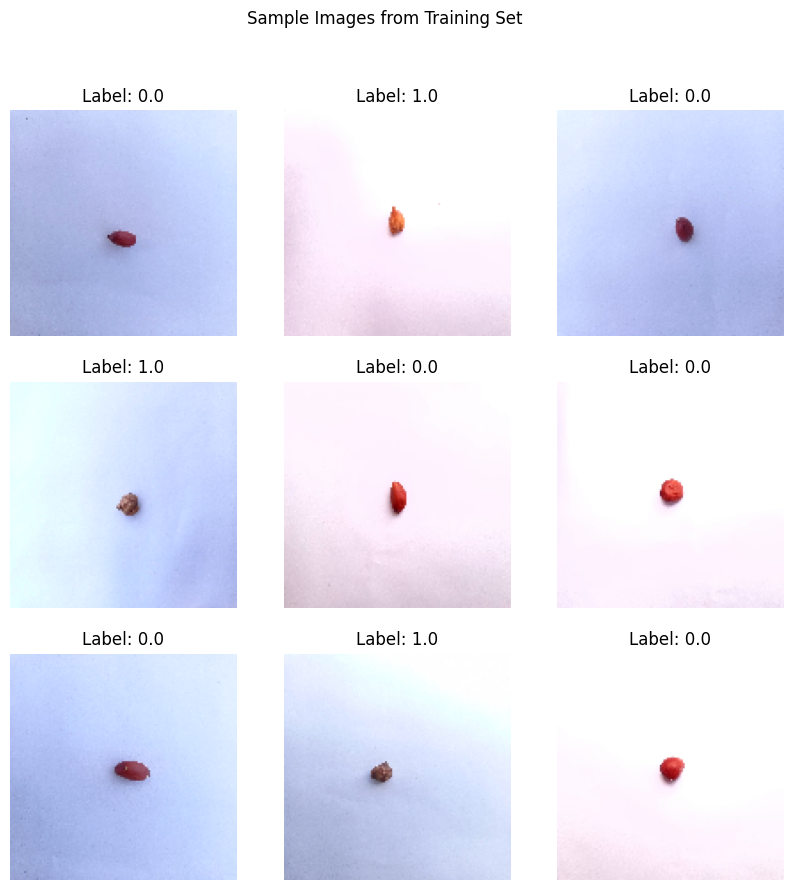

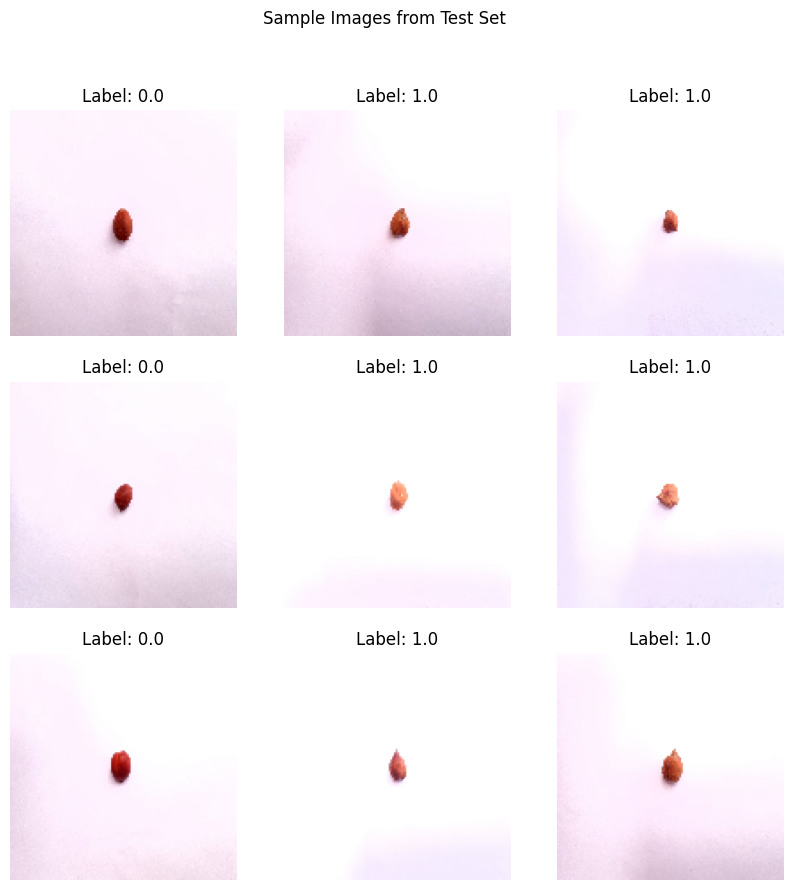

In [5]:
# Get a batch of images and labels from the train dataset
train_images, train_labels = next(train_dataset)

# Get a batch of images and labels from the test dataset
test_images, test_labels = next(test_dataset)

# Display a few images from the train dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title("Label: {}".format(train_labels[i]))
    plt.axis("off")
plt.suptitle("Sample Images from Training Set")
plt.show()

# Display a few images from the test dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title("Label: {}".format(test_labels[i]))
    plt.axis("off")
plt.suptitle("Sample Images from Test Set")
plt.show()

### Build Deep Learning Model

In [6]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPool2D(2, 2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function
model.add(keras.layers.Dense(512, activation="relu"))

# Output layer with single neuron which gives 0 for badam or 1 for chola
# Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Train

In [9]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
27/27 [==============================] - 429s 16s/step - loss: 0.7619 - accuracy: 0.5142 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 2/10
27/27 [==============================] - 110s 4s/step - loss: 0.5718 - accuracy: 0.6910 - val_loss: 0.6168 - val_accuracy: 0.6840
Epoch 3/10
27/27 [==============================] - 104s 4s/step - loss: 0.3112 - accuracy: 0.8703 - val_loss: 0.1036 - val_accuracy: 0.9623
Epoch 4/10
27/27 [==============================] - 104s 4s/step - loss: 0.2351 - accuracy: 0.9009 - val_loss: 0.3845 - val_accuracy: 0.8538
Epoch 5/10
27/27 [==============================] - 97s 4s/step - loss: 0.1650 - accuracy: 0.9422 - val_loss: 0.1189 - val_accuracy: 0.9575
Epoch 6/10
27/27 [==============================] - 102s 4s/step - loss: 0.1084 - accuracy: 0.9540 - val_loss: 0.1104 - val_accuracy: 0.9623
Epoch 7/10
27/27 [==============================] - 98s 4s/step - loss: 0.0883 - accuracy: 0.9682 - val_loss: 0.3635 - val_accuracy: 0.8679
Epoch 8/10
27/

In [10]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print("\nTest accuracy:", test_acc)

7/7 - 19s - loss: 0.1933 - accuracy: 0.9575 - 19s/epoch - 3s/step

Test accuracy: 0.9575471878051758


### Plot

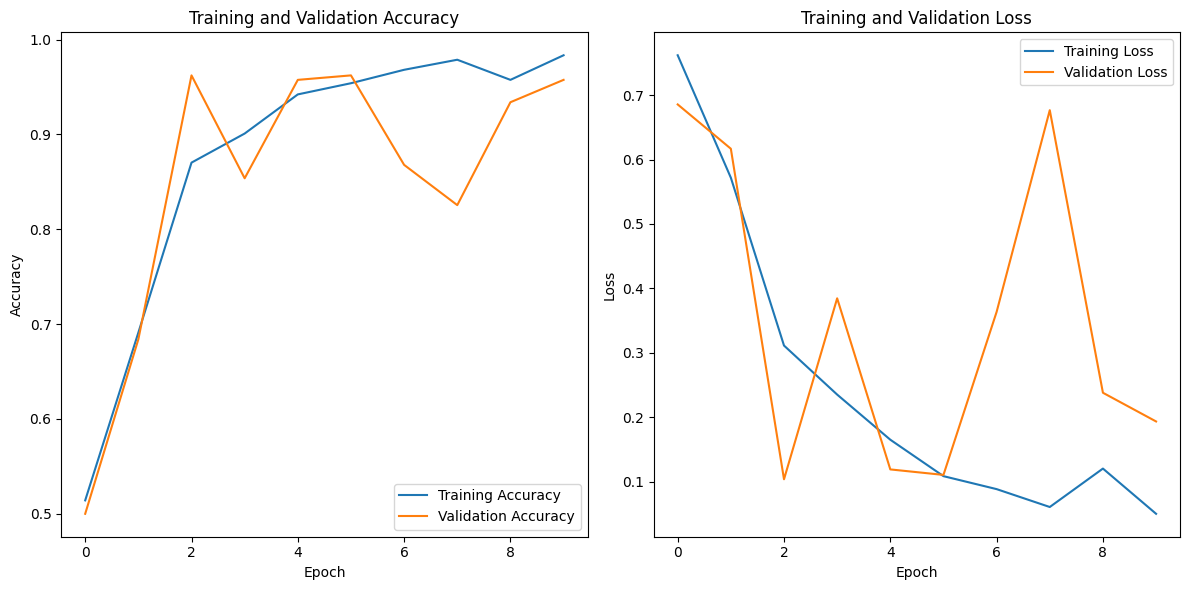

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Load and preprocess a single image

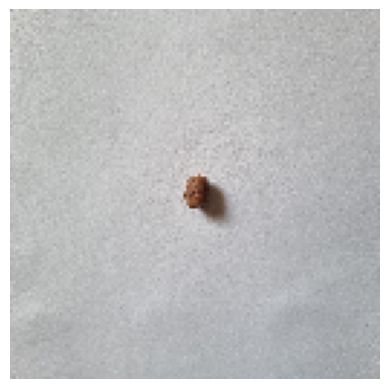

1/1 [==============================] - 1s 1s/step
Prediction: Chola


In [19]:
img_path = "/content/20240224_131205.jpg"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Prediction: Chola")
else:
    print("Prediction: Badam")

### confusion matrix

7/7 [==============================] - 22s 3s/step


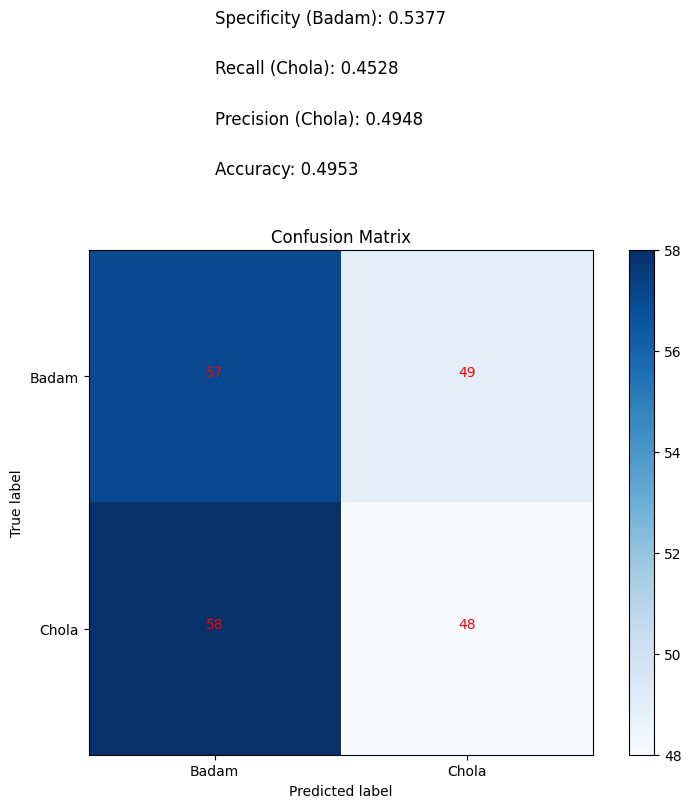

In [20]:
# Assuming you have predictions and true labels from your test set
y_pred = model.predict(test_dataset)
y_true = test_dataset.labels

# Convert predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Define the function to calculate metrics
def calculate_metrics(confusion_matrix):
    TN = confusion_matrix[0, 0]  # True Negatives
    FP = confusion_matrix[0, 1]  # False Positives
    FN = confusion_matrix[1, 0]  # False Negatives
    TP = confusion_matrix[1, 1]  # True Positives

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)

    return accuracy, precision, recall, specificity

# Calculate metrics
accuracy, precision, recall, specificity = calculate_metrics(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['Badam', 'Chola']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Display metrics
plt.text(0, -0.8, f'Accuracy: {accuracy:.4f}', fontsize=12, ha='left')
plt.text(0, -1, f'Precision (Chola): {precision:.4f}', fontsize=12, ha='left')
plt.text(0, -1.2, f'Recall (Chola): {recall:.4f}', fontsize=12, ha='left')
plt.text(0, -1.4, f'Specificity (Badam): {specificity:.4f}', fontsize=12, ha='left')

plt.show()